In [1]:
import pandas as pd

df_2019 = pd.read_csv('./data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20190701000000.csv', names = ['광역시도명', '시군구명', '날짜', '시간대별_시간', '강수_유형명', '습도_값', '강수량_값', '기온_값', '풍속_값', '바람강도_유형명', '동쪽서쪽바람_유형명', '풍향_값', '풍향_카테고리명', '한식_배달건수', '분식_배달건수', '카페/디저트_배달건수', '돈까스/일식_배달건수', '회_배달건수', '치킨_배달건수', '피자_배달건수', '아시안/양식_배달건수', '중식_배달건수', '족발/보쌈_배달건수', '야식_배달건수', '찜탕_배달건수', '도시락_배달건수', '패스트푸드_배달건수'])
df_20200106 = pd.read_csv('./data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200101000000.csv', names = ['광역시도명', '시군구명', '날짜', '시간대별_시간', '강수_유형명', '습도_값', '강수량_값', '기온_값', '풍속_값', '바람강도_유형명', '동쪽서쪽바람_유형명', '풍향_값', '풍향_카테고리명', '한식_배달건수', '분식_배달건수', '카페/디저트_배달건수', '돈까스/일식_배달건수', '회_배달건수', '치킨_배달건수', '피자_배달건수', '아시안/양식_배달건수', '중식_배달건수', '족발/보쌈_배달건수', '야식_배달건수', '찜탕_배달건수', '도시락_배달건수', '패스트푸드_배달건수'])
df_202007 =  pd.read_csv('./data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200701000000.csv', names = ['광역시도명', '시군구명', '날짜', '시간대별_시간', '강수_유형명', '습도_값', '강수량_값', '기온_값', '풍속_값', '바람강도_유형명', '동쪽서쪽바람_유형명', '풍향_값', '풍향_카테고리명', '한식_배달건수', '분식_배달건수', '카페/디저트_배달건수', '돈까스/일식_배달건수', '회_배달건수', '치킨_배달건수', '피자_배달건수', '아시안/양식_배달건수', '중식_배달건수', '족발/보쌈_배달건수', '야식_배달건수', '찜탕_배달건수', '도시락_배달건수', '패스트푸드_배달건수'])

def preprocessing(df):
    del df['습도_값']
    del df['강수량_값']
    del df['기온_값']
    del df['풍속_값']
    del df['바람강도_유형명']
    del df['동쪽서쪽바람_유형명']
    del df['풍향_값']
    del df['풍향_카테고리명']
    # del df['시간대별_시간']
    df['날짜'] = pd.to_datetime(df['날짜'])
    df['총_배달건수'] = df.iloc[:,5:].sum(axis = 1)
    df['요일'] = df['날짜'].dt.weekday

    return df

df_2019 = preprocessing(df_2019);  df_20200106 = preprocessing(df_20200106); df_202007 = preprocessing(df_202007)

In [2]:
df = pd.concat([df_2019, df_20200106, df_202007], axis = 0)

In [3]:
# 가장 빠른 날짜와 가장 늦은 날짜 확인
earliest_date = df['날짜'].min()
latest_date = df['날짜'].max()

# 총 며칠 계산
total_days = (latest_date - earliest_date).days + 1

df_time = df.groupby('시간대별_시간').sum()/total_days

C:\Users\user\AppData\Local\Temp\ipykernel_9512\3036883400.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_time = df.groupby('시간대별_시간').sum()/total_days


# 2. 휴가 전 주와 휴가 시즌 총 배달 음식 주문 수 비교

In [4]:
import pandas as pd

# 데이터프레임 생성
df_0729_0804 = df_2019[(df_2019['날짜'] >= pd.to_datetime('2019-07-29')) & (df_2019['날짜'] <= pd.to_datetime('2019-08-04'))]

# 요약 통계 계산
df_0729_0804_summary = df_0729_0804.groupby('요일').agg({'총_배달건수': 'sum'}).reset_index()

# 결과 출력
print(df_0729_0804_summary)

# 데이터프레임 생성
df_0805_0811 = df_2019[(df_2019['날짜'] >= pd.to_datetime('2019-08-05')) & (df_2019['날짜'] <= pd.to_datetime('2019-08-11'))]

# 요약 통계 계산
df_0805_0811_summary = df_0805_0811.groupby('요일').agg({'총_배달건수': 'sum'}).reset_index()

# 결과 출력
print(df_0805_0811_summary)


   요일  총_배달건수
0   0   12262
1   1   13435
2   2   15110
3   3   16462
4   4   14897
5   5   21463
6   6   22973
   요일  총_배달건수
0   0   19735
1   1   19646
2   2   18951
3   3   19016
4   4   25474
5   5   25418
6   6   29261


In [7]:
import pandas as pd

# 전주 데이터프레임
df_last_week = df_0729_0804_summary['총_배달건수']

# 이번주 데이터프레임
df_this_week = df_0805_0811_summary['총_배달건수']

# 휴가 전 주 대비 총 배달건수
(df_this_week.sum() - df_last_week.sum()) / df_this_week.sum()*100

25.96745417489413

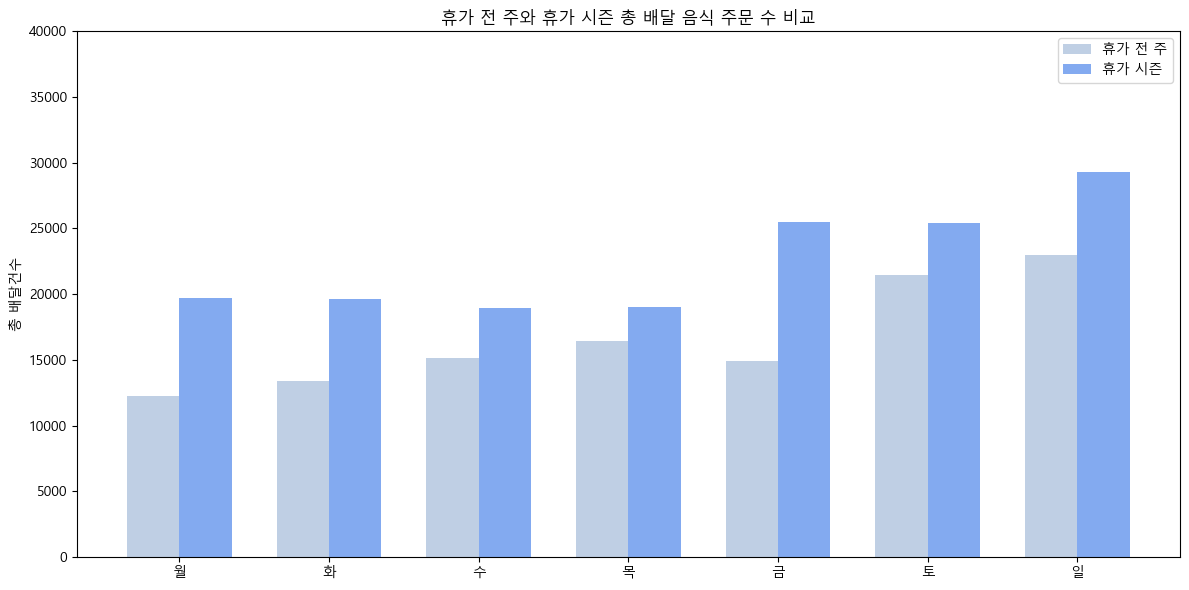

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(7)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x, df_0729_0804_summary['총_배달건수'], bar_width,
                alpha=opacity, color='lightsteelblue', label='휴가 전 주')

rects2 = ax.bar(x + bar_width, df_0805_0811_summary['총_배달건수'], bar_width,
                alpha=opacity, color='cornflowerblue', label='휴가 시즌')

ax.set_ylabel('총 배달건수')
ax.set_title('휴가 전 주와 휴가 시즌 총 배달 음식 주문 수 비교')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'])
ax.legend()

ax.set_ylim([0, 40000])

plt.tight_layout()
plt.show()

-----

# 3. 시간대별 배달 음식 주문량 패턴

In [10]:
# 가장 빠른 날짜와 가장 늦은 날짜 확인
earliest_date = df['날짜'].min()
latest_date = df['날짜'].max()

# 총 며칠 계산
total_days = (latest_date - earliest_date).days + 1 # 397일

C:\Users\user\AppData\Local\Temp\ipykernel_9512\2715165447.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_time = df.groupby('시간대별_시간').sum()/total_days


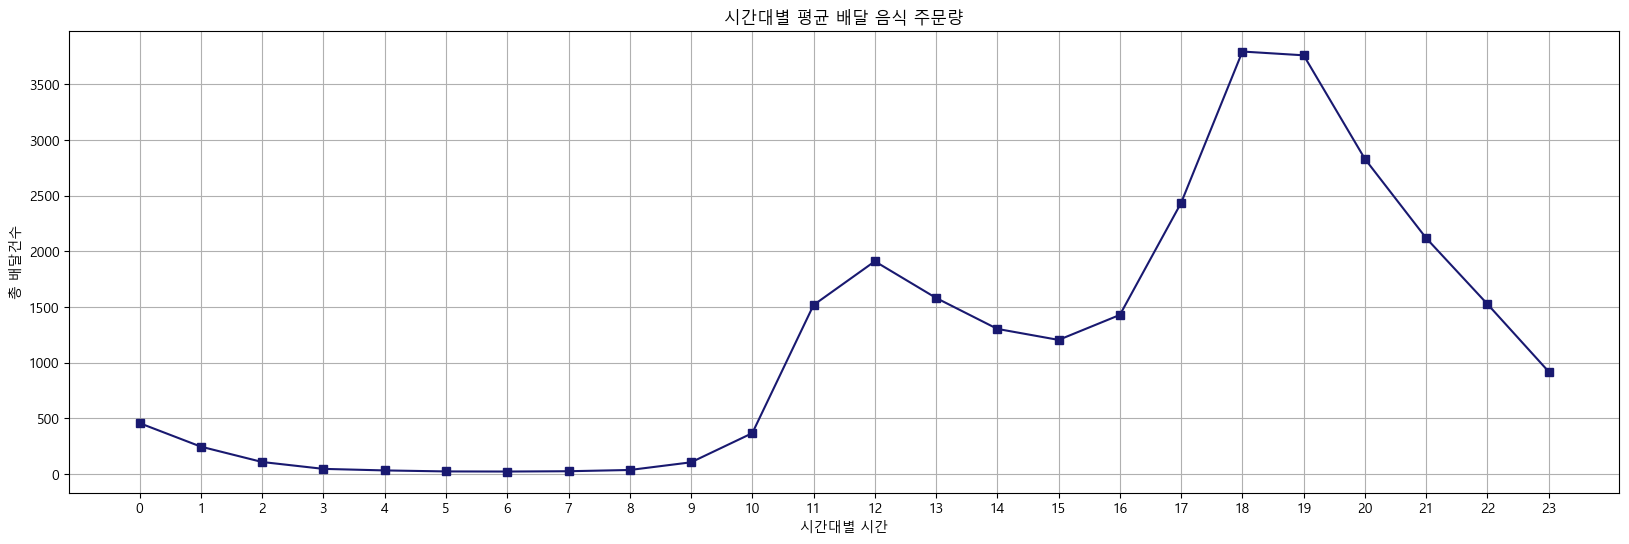

In [11]:
import matplotlib.pyplot as plt

df_time = df.groupby('시간대별_시간').sum()/total_days

plt.figure(figsize=(20, 6))
plt.plot(df_time.index, df_time.총_배달건수, marker='s', color='midnightblue')
plt.xlabel('시간대별 시간')
plt.ylabel('총 배달건수')
plt.title('시간대별 평균 배달 음식 주문량')
plt.xticks(df_time.index)
plt.grid(True)
plt.show()


# 4. 트리맵

In [12]:
# 12시와 18시 필터링
df_12 = df[df['시간대별_시간']==12]
df_18 = df[df['시간대별_시간']==18]

In [31]:
df_12.sum()

C:\Users\user\AppData\Local\Temp\ipykernel_2180\1128498259.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_12.sum()


광역시도명          강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강...
시군구명           강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강...
시간대별_시간                                                   307056
강수_유형명         없음없음없음없음없음없음비없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없...
한식_배달건수                                                   137705
분식_배달건수                                                   130277
카페/디저트_배달건수                                                72902
돈까스/일식_배달건수                                                54454
회_배달건수                                                      4867
치킨_배달건수                                                    58604
피자_배달건수                                                    35180
아시안/양식_배달건수                                                31576
중식_배달건수                                                    43311
족발/보쌈_배달건수                                                 46675
야식_배달건수                                                     7854
찜탕_배달건수                  

In [32]:
df_18.sum()

C:\Users\user\AppData\Local\Temp\ipykernel_2180\1598016232.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_18.sum()


광역시도명          강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강원도강...
시군구명           강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강릉시강...
시간대별_시간                                                   480240
강수_유형명         없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음없음...
한식_배달건수                                                   196054
분식_배달건수                                                   174226
카페/디저트_배달건수                                                86583
돈까스/일식_배달건수                                                71086
회_배달건수                                                     31862
치킨_배달건수                                                   383034
피자_배달건수                                                    73561
아시안/양식_배달건수                                                32093
중식_배달건수                                                    47515
족발/보쌈_배달건수                                                189717
야식_배달건수                                                    60880
찜탕_배달건수                  

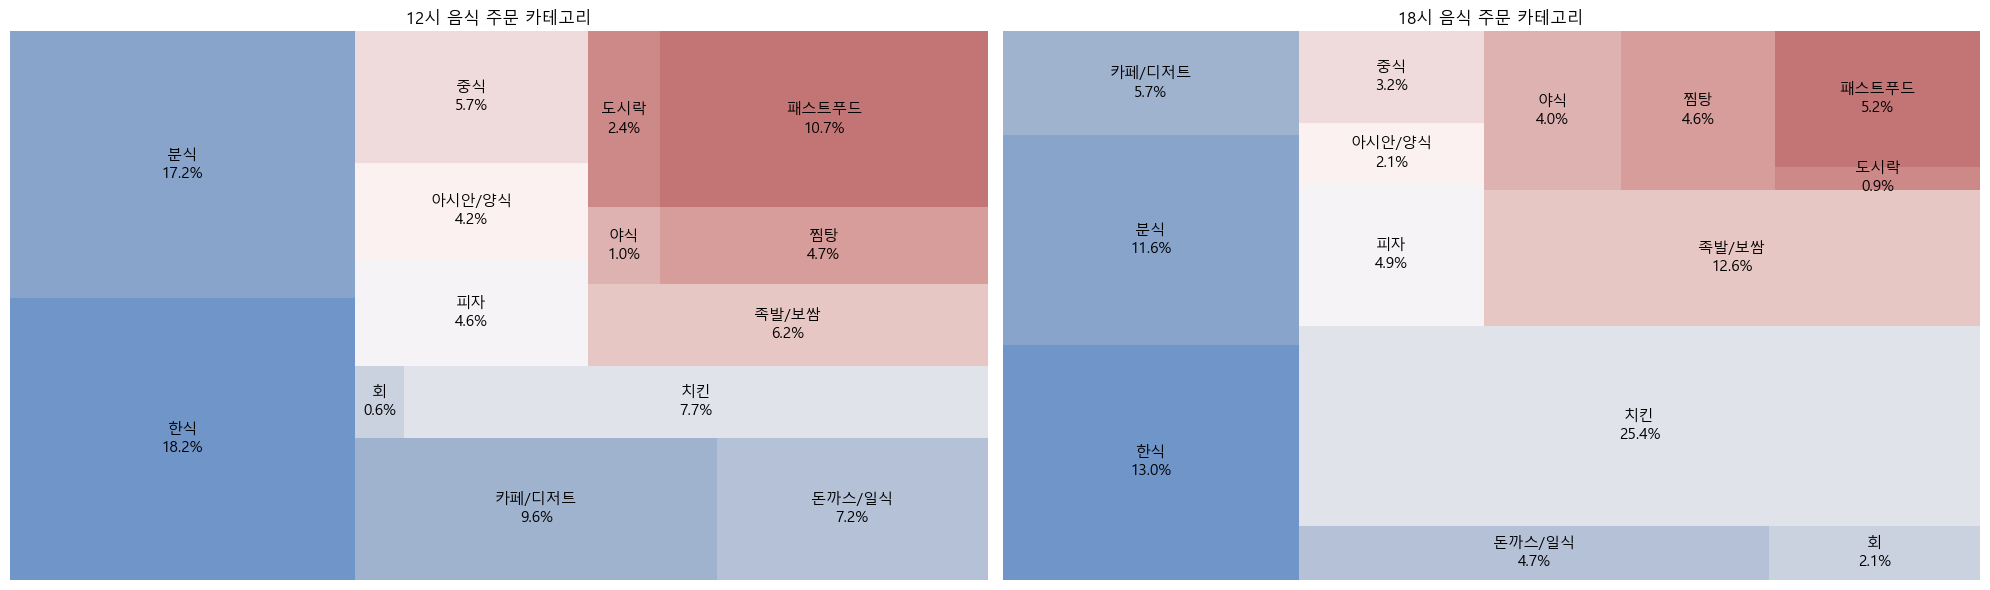

In [13]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# 첫 번째 트리맵에 대한 데이터 정의
categories_12 = ["한식", "분식", "카페/디저트", "돈까스/일식", "회", "치킨", "피자", "아시안/양식", "중식", "족발/보쌈", "야식", "찜탕", "도시락", "패스트푸드"]
delivery_counts_12 = [137705, 130277, 72902, 54454, 4867, 58604, 35180, 31576, 43311, 46675, 7854, 35380, 18083, 81499]

# 첫 번째 트리맵을 위한 백분율 계산
total_count_12 = sum(delivery_counts_12)
percentages_12 = [count/total_count_12 * 100 for count in delivery_counts_12]

# 두 번째 트리맵에 대한 데이터 정의
categories_18 = ["한식", "분식", "카페/디저트", "돈까스/일식", "회", "치킨", "피자", "아시안/양식", "중식", "족발/보쌈", "야식", "찜탕", "도시락", "패스트푸드"]
delivery_counts_18 = [196054, 174226, 86583, 71086, 31862, 383034, 73561, 32093, 47515, 189717, 60880, 68884, 13275, 77832]

# 두 번째 트리맵을 위한 백분율 계산
total_count_18 = sum(delivery_counts_18)
percentages_18 = [count/total_count_18 * 100 for count in delivery_counts_18]

# 일관된 색상을 위한 색상 매핑 딕셔너리 생성
color_mapping = {}
palette = sns.color_palette("vlag", len(categories_12))  # You can change the palette if desired

for i, category in enumerate(categories_12):
    color_mapping[category] = palette[i]

plt.figure(figsize=(20, 6))

# 첫 번째 트리맵 생성
plt.subplot(1, 2, 1)
squarify.plot(sizes=delivery_counts_12, label=[f'{cat}\n{p:.1f}%' for cat, p in zip(categories_12, percentages_12)],
              color=[color_mapping[cat] for cat in categories_12], alpha=0.8, text_kwargs={'fontsize': 11})
plt.axis('off')
plt.title('12시 음식 주문 카테고리')

# 두 번째 트리맵 생성
plt.subplot(1, 2, 2)
squarify.plot(sizes=delivery_counts_18, label=[f'{cat}\n{p:.1f}%' for cat, p in zip(categories_18, percentages_18)],
              color=[color_mapping[cat] for cat in categories_18], alpha=0.8, text_kwargs={'fontsize': 11})
plt.axis('off')
plt.title('18시 음식 주문 카테고리')

plt.tight_layout()
plt.show()
